# Red, Blue, Yellow 
This summer I spent a day with my family to Oasi la Fiumara (http://www.oasilafiumara.com/), a small naturalistic park in the Cilento countryside.\
There are several activities you can practice: hiking, hourse riding, archery, bird watching and so on.\
Kids can also have a lot of fun in the enchanted forest, in the sensorial path and with some curious mazes. One of which caught my attention.
The maze is made up of tiles connected by coloured paths.\
You can move from a tile to another accross the edges only following a specif order.\
And the order is from Red to Blue, from Blue to Yellow and than back to Red. The goal is to reach the tile located in the centre of the Maze.\
The maze has an hexagonal shape and each tile is connected to at most 6 other tiles with edges that span only specif directions: N, NE, SE, S, SW, W, NW.
As always a picture is worth a thousand words.

![alternative text](./IMG_0545.png)

Seems pretty easy right? Well, not really.
It very easy to get trapped in the maze, and falling back on the same tile again and again after getting close to the center tile.
I spent quite some time in that maze. And other persons with me. Nobody solved it.\
Actually none of the visitors of the park I talked to solved the maze.

So what so special about the it?\
Unlike a classical maze, you can visit the same tile multiple times.
But if you take a wrong turn it's not so easy to retrace your step as you are only allowed to move ciclically along the coloured paths.\
Also having to litterally walk from a tile to another, without really having an overall view of the maze, and with other persons constantly stepping on your foot (that too litterally) it is a much harder task.

However at my desk it's different task. Let's put recursion and backtracking into action.

In [65]:
import numpy as np
from matplotlib import pyplot as plt

# What to do to solve the maze

Like all the maze games we need first to establish the starting and final (winning) conditions.\
That's pretty easy: We always start from the same tile, and win when we step on the central tile.\
We then need to define the maze in a numerical form (grid).\
The shape of the maze is fixed and must be carefully designed to allow the execution according to the rules of the game.\
Once we have a playground (a grid), we can implement the rules of the game:
1. In which direcetion is the next move possible? This require checking for a connecting path between two tiles and keeping track of the last color walked on.
1. If these conditions are satisfied we move to the next tile and continue with the game.

There are two conditions that can lead to a dead-end
1. We win the game. We follow a path that leads to the final tile.
1. We get stuck in a loop. This happens when we land on the same tile twice and coming from the same color.
If the last condition is verified we must step back and find an alternative route.

We thus can use recursion to move from one tile to another and bracktracking to step-back when we meet a stopping condition

# The Maze a.k.a the grid
In a 2D representation the maze looks like this.\
The structure look a lot like a graph with nodes connected by edges.\
However representing this maze with a graph structure would not grant any of the advanatges respect to a standard 2D grid, since all the nodes are connected in both directions and we can only move with a step of one from one tile to another.\
Thus for the grid a 2-dimensional matrix was chosen.
The grid was coded with the following convention:
1. Empty space is marked with 0
1. Conneting tiles are marked with 1
2. Red path is 2, Blue path is 3, Yellow path is 4
2. Winning tile -1
2. To avoid setting up boundary conditions the matrix has been padded with zeros along the borders.

Visually the grid is plotted on the right hand side of the figure below. whith the color-coded convention just established.

In [66]:
board = np.matrix([
       # 0   1    2    3    4    5    6    7    8    9   10   11   12   13   14 
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 0
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 1
       [ 0., 0.,  0.,  0.,  0.,  0.,  4.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.], # 2
       [ 0., 0.,  0.,  0.,  0.,  1.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.], # 3
       [ 0., 0.,  0.,  0.,  3.,  3.,  2.,  3.,  3.,  3.,  4.,  0.,  0.,  0.,  0.], # 4
       [ 0., 0.,  0.,  1.,  0.,  3.,  0.,  1.,  0.,  3.,  0.,  1.,  0.,  0.,  0.], # 5
       [ 0., 0.,  2.,  3.,  4.,  3.,  3.,  4.,  3.,  3.,  2.,  2.,  3.,  0.,  0.], # 6
       [ 0., 1.,  0.,  3.,  0.,  1.,  0.,  4.,  0.,  1.,  0.,  2.,  0.,  1.,  0.], # 7
       [ 0., 3.,  4.,  3.,  3.,  3.,  2.,  4.,  3.,  4.,  4.,  2.,  2.,  4.,  0.], # 8
       [ 0., 3.,  0.,  1.,  0.,  3.,  0.,  1.,  0.,  4.,  0.,  1.,  0.,  4.,  0.], # 9
       [ 0., 3.,  2.,  4.,  2.,  3.,  4.,  2.,  3.,  4.,  3.,  2.,  2.,  4.,  0.], # 10
       [ 0., 1.,  0.,  4.,  0.,  1.,  0.,  2.,  0.,  1.,  0.,  2.,  0.,  1.,  0.], # 11
       [ 0., 4.,  2.,  4.,  4.,  2.,  0.,  2.,  0.,  4.,  2.,  2.,  2.,  3.,  0.], # 12
       [ 0., 4.,  0.,  1.,  0.,  2.,  0., -1.,  0.,  4.,  0.,  1.,  0.,  3.,  0.], # 13
       [ 0., 4.,  3.,  4.,  3.,  2.,  0.,  0.,  0.,  4.,  3.,  3.,  4.,  3.,  0.], # 14
       [ 0., 1.,  0.,  4.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  3.,  0.,  1.,  0.], # 15
       [ 0., 4.,  2.,  4.,  3.,  3.,  4.,  0.,  3.,  2.,  4.,  3.,  2.,  2.,  0.], # 16
       [ 0., 4.,  0.,  1.,  0.,  3.,  0.,  1.,  0.,  2.,  0.,  1.,  0.,  2.,  0.], # 17
       [ 0., 4.,  3.,  3.,  4.,  3.,  2.,  2.,  3.,  2.,  2.,  3.,  2.,  2.,  0.], # 18
       [ 0., 1.,  0.,  3.,  0.,  1.,  0.,  2.,  0.,  1.,  0.,  3.,  0.,  1.,  0.], # 19
       [ 0., 0.,  2.,  3.,  2.,  3.,  4.,  2.,  4.,  3.,  4.,  3.,  3.,  0.,  0.], # 20
       [ 0., 0.,  0.,  1.,  0.,  3.,  0.,  1.,  0.,  3.,  0.,  1.,  0.,  0.,  0.], # 21
       [ 0., 0.,  0.,  0.,  4.,  3.,  4.,  3.,  2.,  3.,  2.,  0.,  0.,  0.,  0.], # 22
       [ 0., 0.,  0.,  0.,  0.,  1.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.], # 23
       [ 0., 0.,  0.,  0.,  0.,  0.,  2.,  3.,  4.,  0.,  0.,  0.,  0.,  0.,  0.], # 24
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 25
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 26
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 27
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 28
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 29 
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]  # 30
])


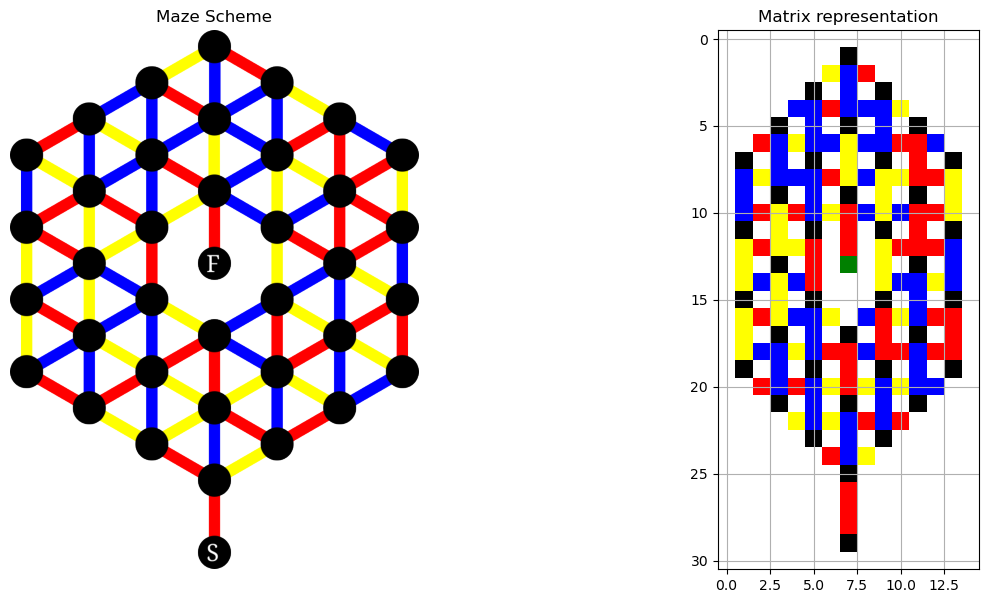

In [67]:
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap

fig, axes = plt.subplots(1,2, figsize=(15,7))
img = mpimg.imread('g1.png')
imgplot = axes[0].imshow(img)
axes[0].axis(False)
axes[0].title.set_text('Maze Scheme')

cmap = ListedColormap(["green", "white", "black", "red", 'blue', 'yellow'])
cax = axes[1].imshow(board, cmap=cmap)
axes[1].axis(True)
axes[1].grid(True)
axes[1].title.set_text('Matrix representation')
plt.show()

# The Maze Solver
From each tile on the maze we need a function that tells us in which direction a move is possible and what are the grid coordinates of the new tile.
To leave things simple we use two helper functions to keep track of just that.

In [68]:
def available_directions(pos: tuple, previous: int):
    '''Take the current position on the board and the previous color.
    Return a list of possible directions where the move is allowed'''
    x = pos[0]
    y = pos[1]
    directions = []
    # Check if move is allowed in all the possible directions
    if int(board[x - 1, y]) != 0: directions.append( (x - 1, y, int(board[x - 1, y]), 'N') ) # N
    if int(board[x - 1, y + 1]) != 0: directions.append( (x - 1, y + 1, int(board[x - 1, y + 1]), 'NE') ) # NE
    if int(board[x, y + 1]) != 0: directions.append( (x, y + 1, int(board[x, y + 1]), 'E') ) # E
    if int(board[x + 1, y + 1]) != 0: directions.append( (x + 1, y + 1, int(board[x + 1, y + 1]), 'SE') ) # SE
    if int(board[x + 1, y]) != 0: directions.append( (x + 1, y, int(board[x + 1, y]), 'S') ) # S
    if int(board[x + 1, y - 1]) != 0: directions.append( (x + 1, y - 1, int(board[x + 1, y - 1]), 'SW') ) # SW
    if int(board[x, y - 1]) != 0: directions.append( (x, y - 1, int(board[x, y - 1]), 'W') ) # W
    if int(board[x - 1, y - 1]) != 0: directions.append( (x - 1, y - 1, int(board[x - 1, y - 1]), 'NW' )) # NW
    
    # Check if move is allowed by the color condition
    possible = []
    for coord in directions:
        if (previous == 2) & (coord[2] == 3): possible.append(coord) # From Red to Blue
        if (previous == 3) & (coord[2] == 4): possible.append(coord) # From Blue to Yellow
        if (previous == 4) & (coord[2] == 2): possible.append(coord) # From Yellow to Red
    return possible


def next_tile(directions: list):
    '''
        return coordinates of the next tile where a move is allowed.    
    '''
    next_tiles = []
    
    for direction in directions:
        if direction[3] == 'N': next_tiles.append( (direction[0] - 3,  direction[1], direction[2],  direction[3] ))
        if direction[3] == 'S': next_tiles.append( (direction[0] + 3,  direction[1], direction[2],  direction[3] ))
        if direction[3] == 'NE': next_tiles.append( (direction[0] - 1,  direction[1] + 1, direction[2],  direction[3] ))
        if direction[3] == 'SE': next_tiles.append( (direction[0] + 1,  direction[1] + 1, direction[2],  direction[3] ))
        if direction[3] == 'SW': next_tiles.append( (direction[0] + 1,  direction[1] - 1, direction[2],  direction[3] ))
        if direction[3] == 'NW': next_tiles.append( (direction[0] - 1,  direction[1] - 1, direction[2],  direction[3] ))
    return next_tiles


We can now play the game.
We must keep track of two conditions:
1. We have won the game. Congratulation.
2. We are stuck in loop. Backtrack

To play the game we must know the current position and calculate all the possible move

In [69]:
def RBY(pos: tuple, previous: int ):
    '''
    Solve the maze.
            PARAMETERS:
                pos: tuple,
                    coordinates with the current position
                previous: int
                    Color previously moved across (2: Red, 3: Blue, 4: Yellow)
                next_tile: list
                    coordinates of the next possible positions
    '''
    global solution, visited
    # Winning condition
    if int(board[pos]) == -1:
        if solution:
            if len(visited) < len(solution): 
                solution = visited.copy() # Only store the shortest path to the solution
        else:
            solution = visited.copy()
        return
    directions = available_directions(pos, previous)
    next_tiles = next_tile(directions)
    
    for tile in next_tiles:
        if tile[0:3] in visited: # try all possible moves
            continue 
        else: # If we have not visited the next tile
            visited.append( (tile[0:3]) ) # We add it to the visited set
            pos = (tile[0:2]) # We move on the tile i.e. update the current position
            previous = tile[2] # We keep track of the previous color
            RBY(pos, previous) # Recursive call
            visited.pop() # if no move is possible from the next tile, we backtrack. We remove the last visited tile and try other paths in the call stack

The maze solver seems to perform its task correctly.
The base case checks if the maze is solved. In which case a solution (the set of moves to reach the end tile) is stored in a global variable.\
Also a condtional statement make sue that only the shortest path is saved.

If the base case is not satisfied, we check what the next possible moves are and the coordinates of the tiles.\
We loop though all the possible tiles, if one tile has been visited we try the next one.
If the move is possible we step on the tile, update the set of visited tile, the current position and keep track of the previous color.
If no moves are possible we are in a dead-end. Thus the choices that led here were wrong and we need to backtrack.\
We remove the the last tile from the visited set and we revert to a previous state a try differnt directions.

The process is repeated until the whole space (grid) is explored.

At the end of the execution we can inspect the solution which contain the set of coordinates of the tiles from the starting to the finish tile.\
Visually this is not the best way to present the solution, thus a last helper function is defined to give the geographical indications on how to traverse the grid.


In [70]:
def print_solution(solution):
    print ('0: Move N')
    for i in range(len(solution) -1):
        row = solution[i][0]
        col = solution[i][1]
        if (solution[i+1][1] == col) & (solution[i+1][0] < row):
            print(f'{i+1}: Move N')
        if (solution[i+1][1] == col) & (solution[i+1][0] > row):
            print(f'{i+1}: Move S')
            
        if (solution[i+1][0] < row) & (solution[i+1][1] > col):
            print(f'{i+1}: Move NE')
        if (solution[i+1][0] > row) & (solution[i+1][1] > col):
            print(f'{i+1}: Move SE')
            
        if (solution[i+1][0] < row) & (solution[i+1][1] < col):
            print(f'{i+1}: Move NW')
        if (solution[i+1][0] > row) & (solution[i+1][1] < col):
            print(f'{i+1}: Move SW')
        

# Do the thing

In [71]:
# Set starting position (First move is trivial)
solution = []
pos = (25, 7)
previous = 2 # coming from RED
visited =  [(pos[0],) + (pos[1],)  + (previous,)] # Initialize visited set
RBY(pos, previous)
print_solution(solution)

0: Move N
1: Move N
2: Move NW
3: Move NE
4: Move NE
5: Move SE
6: Move SW
7: Move S
8: Move SW
9: Move NW
10: Move N
11: Move NW
12: Move NW
13: Move NE
14: Move NE
15: Move NW
16: Move N
17: Move SE
18: Move SE
19: Move NE
20: Move SE
21: Move NE
22: Move NW
23: Move NW
24: Move NW
25: Move S
26: Move S
27: Move S


# Notes

The maze solver function returns the shortest path that leads from the starting tile to the winning tile. Thus the optimal solution.\
In order to find the shortest path the entire space must be explored, thus an early stopping condition that immediately returns the first solution is not ideal.\
The memoization strategy implemented is based on the definition of the global variables: the visited and the solution set.\
Probably they could both be moved from the global scope to the local scope of the function, but I don't find a problem with leaving them where they are.\
Recursion and backtracking problems can be very tricky to visualize. But since the basic idea is to find a solution to a small sub-problem it's convenient to begin with a much simpler version of the problem at hand.
Below there is a simplified version of the board that I used to test my logic while trying to code a solution.

In [72]:
board = np.matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],   
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.], # 13
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  4.,  0.,  0.], # 14
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.], # 15
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  2.,  0.], # 16
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0., -1.,  0.,  2.,  0.], # 17
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  0.], # 18
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.], # 19
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  4.,  0.,  3.,  0.,  0.], # 20
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.], # 21
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 22
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 23
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 24
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 25
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 26
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 27
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 28
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], # 29 
       [ 0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])# 30

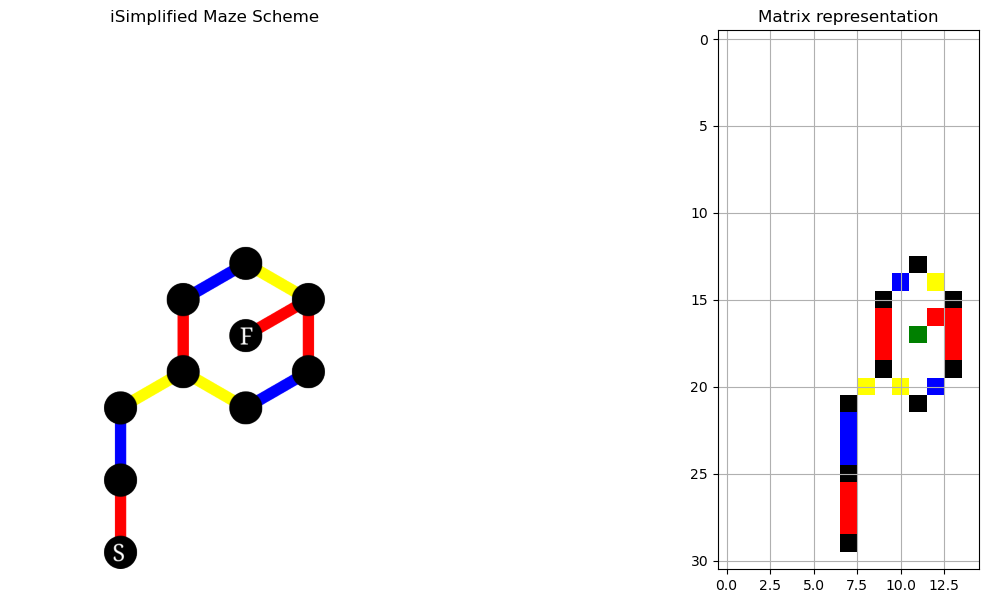

In [73]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
img = mpimg.imread('rect299.png')
imgplot = axes[0].imshow(img)
axes[0].axis(False)
axes[0].title.set_text('iSimplified Maze Scheme')

cmap = ListedColormap(["green", "white", "black", "red", 'blue', 'yellow'])
cax = axes[1].imshow(board, cmap=cmap)
axes[1].axis(True)
axes[1].grid(True)
axes[1].title.set_text('Matrix representation')
plt.show()

In [74]:
# Set starting position (First move is trivial)
solution = []
pos = (25, 7)
previous = 2 # coming from RED
visited =  [(pos[0],) + (pos[1],)  + (previous,)] # Initialize visited set
RBY(pos, previous)
print_solution(solution)

0: Move N
1: Move N
2: Move NE
3: Move N
4: Move NE
5: Move SE
6: Move SW


# Solution

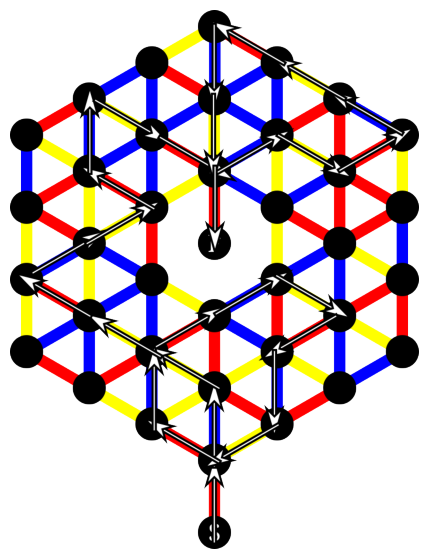

In [75]:
fig, axes = plt.subplots(figsize=(15,7))
img = mpimg.imread('g112.png')
imgplot = axes.imshow(img)
axes.axis(False)
plt.show()